## EDA for Credit-Scoring dataset

#### 1. Import of libraries and Data Source:


>>_view first 5 rows of dataset_

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   


df = pd.read_csv("../data/raw/cs-training.csv")
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                       

#### 2. Dataset information check:

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

<div class="alert alert-block alert-info">
<b>Important!:</b> MonthlyIncome and NumberOfDependents have quite a lot of missing data. Let's count how many:
</div>

In [4]:
print('MonthlyIncome column has missing data of percentage ', round(df['MonthlyIncome'].isna().sum()*100/len(df)))
print('NumberOfDependents column has missing data of percentage ', round(df['NumberOfDependents'].isna().sum()*100/len(df)))

MonthlyIncome column has missing data of percentage  20
NumberOfDependents column has missing data of percentage  3


#### 3. Dataset main parameters check:

In [5]:
print(df.describe(include='all'))

          Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  150000.000000                         150000.000000  150000.000000   
mean       52.295207                              0.421033     353.005076   
std        14.771866                            

>>> Index column Unnamed:0 appeared in dataset and needs to be removed, the most highly dispersed column is DebtRatio, it also has unrealistic maximum

#### 4. Data exploration with histograms:

>>>> 4.1. SeriousDlqin2yrs is the target variable. Here is the histogram and percentage of positive values (1)

C:\Users\elena\AppData\Local\Temp\ipykernel_40172\40803180.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (x='SeriousDlqin2yrs',data=df,palette='RdBu_r')


SeriousDlqin2yrs positive percentage is  7


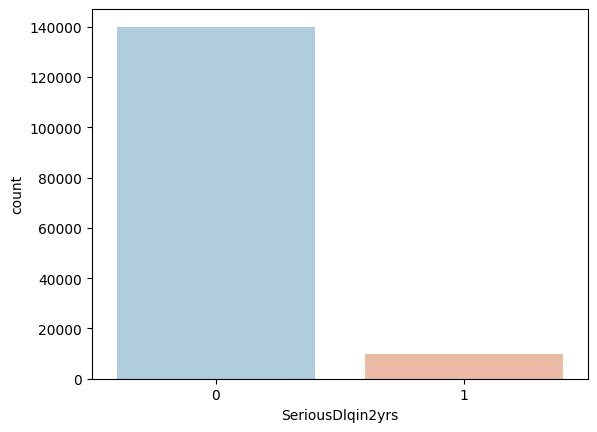

In [6]:
sns.countplot (x='SeriousDlqin2yrs',data=df,palette='RdBu_r')
print('SeriousDlqin2yrs positive percentage is ', round(len(df[df['SeriousDlqin2yrs']==1])*100/len(df)))

>>>> 4.2. Here is the histogram of DebtRatio:

c:\Users\elena\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


<Axes: xlabel='DebtRatio', ylabel='Count'>

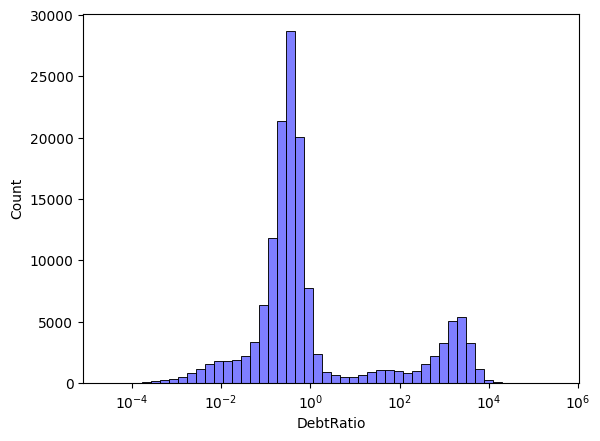

In [7]:
sns.histplot(data=df, x='DebtRatio', bins=50, kde=True, color='blue', log_scale=True)

>>>>As DebtRatio is percentage 'Monthly debt payments, alimony,living costs divided by monthy gross income', all values > 1 may show clients at high risk or low data quality. Let's check the fracture of dataset, where DebtRation is higher than 1:


In [8]:
df_debt = df[df['DebtRatio']>1]
print(df_debt.head())
print('Percentage of rows with DebtRatio > 1 is ', round(len(df_debt)*100/len(df)))

    Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
6            7                 0                              0.305682   57   
8            9                 0                              0.116951   27   
14          15                 0                              0.019657   76   
16          17                 0                              0.061086   78   
25          26                 1                              0.392248   50   

    NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
6                                      0  5710.000000            NaN   
8                                      0    46.000000            NaN   
14                                     0   477.000000            0.0   
16                                     0  2058.000000            NaN   
25                                     0     1.595253         4676.0   

    NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
6                           

<div class="alert alert-block alert-info">
<b>Important!:</b> Missing Monthly Income Data might impact DebtRatio a lot misleading the prediction. 
</div> 

>>> 4.3. Let's take a look at histogram of MonthlyIncome

c:\Users\elena\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


<Axes: xlabel='MonthlyIncome', ylabel='Count'>

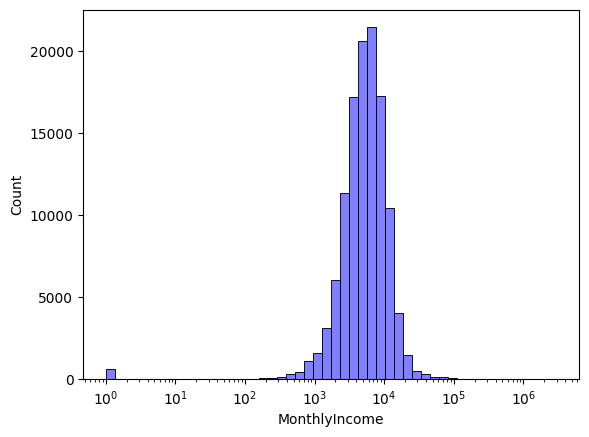

In [9]:
sns.histplot(data=df, x='MonthlyIncome', bins=50, kde=True, color='blue', log_scale=True)


>>>> MonthlyIncome has normal distribution with outliers of 0.

>>>> 4.4. Here is the histogram of NumberOfOpenCreditLinesAndLoans with split by target value

>>>> We can observe normal distribution

<Axes: xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='count'>

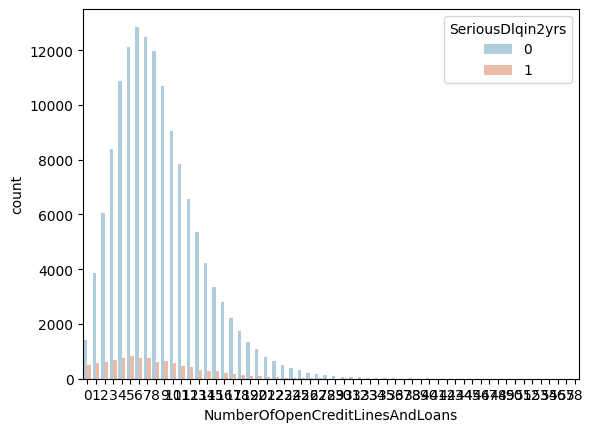

In [10]:
sns.countplot(x='NumberOfOpenCreditLinesAndLoans',hue='SeriousDlqin2yrs',data=df,palette='RdBu_r')

>>>> 4.4 Here is the histogram of RevolvingUtilizationOfUnsecuredLines

>>>> Data looks a bit skewed, the majority of values are close to 1.

c:\Users\elena\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


<Axes: xlabel='RevolvingUtilizationOfUnsecuredLines', ylabel='Count'>

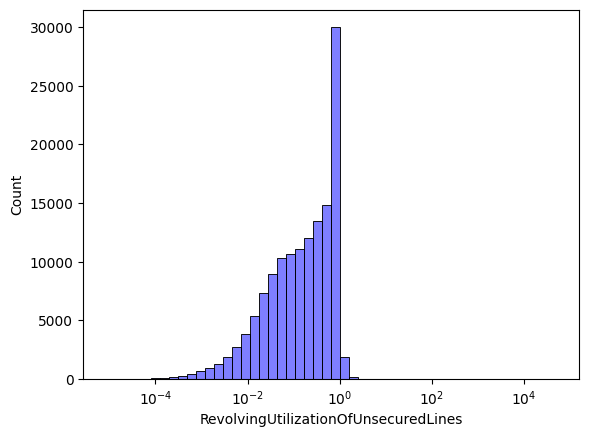

In [ ]:
sns.histplot(data=df, x='RevolvingUtilizationOfUnsecuredLines', bins=50, kde=True, color='blue', log_scale=True)


>>>> 4.5 Additional box graph shows some dependance between NumberofDependents and target value

C:\Users\elena\AppData\Local\Temp\ipykernel_40172\1033455317.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="SeriousDlqin2yrs", y="NumberOfDependents", data=df,palette='rainbow')


<Axes: xlabel='SeriousDlqin2yrs', ylabel='NumberOfDependents'>

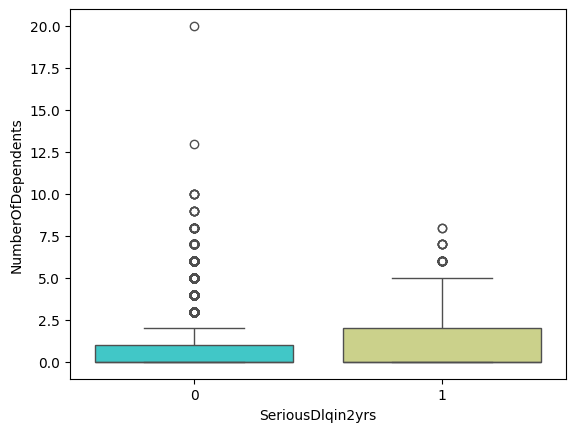

In [12]:
sns.boxplot(x="SeriousDlqin2yrs", y="NumberOfDependents", data=df,palette='rainbow')


>>>> 4.6 Additional box graph shows some dependance between Age and target value. The older people are, less likely they will miss the payment

C:\Users\elena\AppData\Local\Temp\ipykernel_40172\74672035.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="SeriousDlqin2yrs", y="age", data=df,palette='rainbow')


<Axes: xlabel='SeriousDlqin2yrs', ylabel='age'>

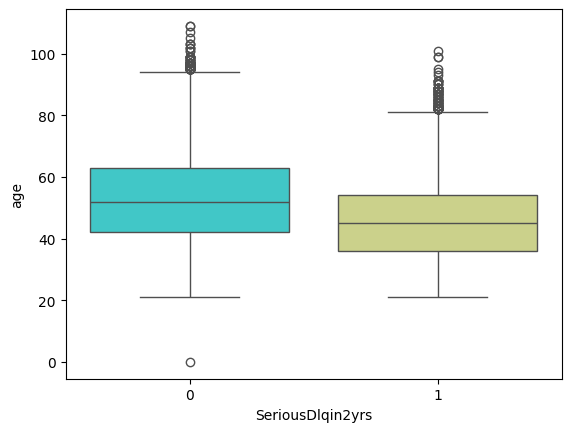

In [27]:
sns.boxplot(x="SeriousDlqin2yrs", y="age", data=df,palette='rainbow')

<div class="alert alert-block alert-info">
<b>Conclusion:</b> The quality of data is medium. Missing data replacement is required. MonthlyInclome is missing 20% of the data, which is a lot. Also it can impact DebtRation, which potentially has been counted based on MonthlyIncome column. Data distribution is normal for columns with missing values, which allows up to use mean values.
</div> 
